In [2]:
!ls /kaggle/input/new-plant-diseases-dataset/New\ Plant\ Diseases\ Dataset\(Augmented\)/'New Plant Diseases Dataset(Augmented)'

ls: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented): No such file or directory


In [70]:
import os
import pickle
import numpy as np
import cv2
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tqdm import tqdm
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
img_size=(256,256)
n_img=100
root_dir="/Users/shashwatraj/Garud-Plant-Disease-Detection/plantsDataset/plants_dataset"
train_dir=os.path.join(root_dir,"train")
val_dir=os.path.join(root_dir,"valid")

In [4]:
def convert(img_dir):
    try:
        img=cv2.imread(img_dir)
        if img is not None:
            img=cv2.resize(img,img_size)
            return img_to_array(img)
        else:
            return np.array([])
    except:
        print("Error!")
        return None

In [5]:
img_list_train=[]
label_list_train=[]
try:
    print("Loading images...")
    diseases_folders_list=os.listdir(train_dir)
    for diseases_folder in diseases_folders_list:
        print(f"Processing {diseases_folder}...")
        diseases_images_list=os.listdir(f"{train_dir}/{diseases_folder}/")
        for image in tqdm(diseases_images_list):
            image_directory=f"{train_dir}/{diseases_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                img_list_train.append(image_directory)
                label_list_train.append(diseases_folder)
    print("Images processed!")
except Exception as e:
    print(f"Error:{e}")
print("Number of images processed:",len(img_list_train))

Loading images...
Processing Strawberry___healthy...


100%|██████████| 1824/1824 [00:00<00:00, 604966.83it/s]


Processing Grape___Black_rot...


100%|██████████| 1888/1888 [00:00<00:00, 1497229.33it/s]


Processing Potato___Early_blight...


100%|██████████| 1939/1939 [00:00<00:00, 3338569.56it/s]


Processing Blueberry___healthy...


100%|██████████| 1816/1816 [00:00<00:00, 3766991.13it/s]


Processing Corn_(maize)___healthy...


100%|██████████| 1859/1859 [00:00<00:00, 4602840.10it/s]


Processing Tomato___Target_Spot...


100%|██████████| 1827/1827 [00:00<00:00, 2562874.05it/s]


Processing Peach___healthy...


100%|██████████| 1728/1728 [00:00<00:00, 3917706.66it/s]


Processing Potato___Late_blight...


100%|██████████| 1939/1939 [00:00<00:00, 2466713.82it/s]


Processing Tomato___Late_blight...


100%|██████████| 1851/1851 [00:00<00:00, 3832012.19it/s]


Processing Tomato___Tomato_mosaic_virus...


100%|██████████| 1790/1790 [00:00<00:00, 3816880.61it/s]


Processing Pepper,_bell___healthy...


100%|██████████| 1988/1988 [00:00<00:00, 3488818.56it/s]


Processing Orange___Haunglongbing_(Citrus_greening)...


100%|██████████| 2010/2010 [00:00<00:00, 4041491.39it/s]


Processing Tomato___Leaf_Mold...


100%|██████████| 1882/1882 [00:00<00:00, 3863769.03it/s]


Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot)...


100%|██████████| 1722/1722 [00:00<00:00, 3086577.56it/s]


Processing Cherry_(including_sour)___Powdery_mildew...


100%|██████████| 1683/1683 [00:00<00:00, 2020324.45it/s]

Processing Apple___Cedar_apple_rust...



100%|██████████| 1760/1760 [00:00<00:00, 736062.92it/s]


Processing Tomato___Bacterial_spot...


100%|██████████| 1702/1702 [00:00<00:00, 762600.73it/s]


Processing Grape___healthy...


100%|██████████| 1692/1692 [00:00<00:00, 3532485.00it/s]


Processing Tomato___Early_blight...


100%|██████████| 1920/1920 [00:00<00:00, 3823866.89it/s]


Processing Corn_(maize)___Common_rust_...


100%|██████████| 1907/1907 [00:00<00:00, 3711618.44it/s]


Processing Grape___Esca_(Black_Measles)...


100%|██████████| 1920/1920 [00:00<00:00, 4220683.27it/s]


Processing Raspberry___healthy...


100%|██████████| 1781/1781 [00:00<00:00, 3948232.25it/s]


Processing Tomato___healthy...


100%|██████████| 1926/1926 [00:00<00:00, 3598320.49it/s]


Processing Cherry_(including_sour)___healthy...


100%|██████████| 1826/1826 [00:00<00:00, 3261839.48it/s]


Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus...


100%|██████████| 1961/1961 [00:00<00:00, 3624958.19it/s]


Processing Apple___Apple_scab...


100%|██████████| 2016/2016 [00:00<00:00, 4192224.52it/s]


Processing Corn_(maize)___Northern_Leaf_Blight...


100%|██████████| 1908/1908 [00:00<00:00, 2857098.19it/s]


Processing Tomato___Spider_mites Two-spotted_spider_mite...


100%|██████████| 1741/1741 [00:00<00:00, 3546519.31it/s]


Processing Peach___Bacterial_spot...


100%|██████████| 1838/1838 [00:00<00:00, 3791997.42it/s]


Processing Pepper,_bell___Bacterial_spot...


100%|██████████| 1913/1913 [00:00<00:00, 3111168.50it/s]


Processing Tomato___Septoria_leaf_spot...


100%|██████████| 1745/1745 [00:00<00:00, 3922326.09it/s]


Processing Squash___Powdery_mildew...


100%|██████████| 1736/1736 [00:00<00:00, 3842380.87it/s]


Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot...


100%|██████████| 1642/1642 [00:00<00:00, 1308329.63it/s]


Processing Apple___Black_rot...


100%|██████████| 1987/1987 [00:00<00:00, 3047196.36it/s]


Processing Apple___healthy...


100%|██████████| 2008/2008 [00:00<00:00, 4181808.56it/s]


Processing Strawberry___Leaf_scorch...


100%|██████████| 1774/1774 [00:00<00:00, 3855282.54it/s]


Processing Potato___healthy...


100%|██████████| 1824/1824 [00:00<00:00, 1647375.21it/s]


Processing Soybean___healthy...


100%|██████████| 2022/2022 [00:00<00:00, 3521961.25it/s]

Images processed!
Number of images processed: 70295


In [20]:
img_list_valid=[]
label_list_valid=[]
try:
    print("Loading images...")
    diseases_folders_list=os.listdir(val_dir)
    for diseases_folder in diseases_folders_list:
        print(f"Processing {diseases_folder}...")
        diseases_images_list=os.listdir(f"{val_dir}/{diseases_folder}/")
        for image in tqdm(diseases_images_list):
            image_directory=f"{val_dir}/{diseases_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                img_list_valid.append(image_directory)
                label_list_valid.append(diseases_folder)
    print("Images processed!")
except Exception as e:
    print(f"Error:{e}")
print("Number of images processed:",len(img_list_valid))

Loading images...
Processing Strawberry___healthy...


100%|██████████| 456/456 [00:00<00:00, 1504801.44it/s]


Processing Grape___Black_rot...


100%|██████████| 472/472 [00:00<00:00, 2726875.33it/s]


Processing Potato___Early_blight...


100%|██████████| 485/485 [00:00<00:00, 1058947.13it/s]


Processing Blueberry___healthy...


100%|██████████| 454/454 [00:00<00:00, 3755846.19it/s]


Processing Corn_(maize)___healthy...


100%|██████████| 465/465 [00:00<00:00, 4599885.28it/s]


Processing Tomato___Target_Spot...


100%|██████████| 457/457 [00:00<00:00, 3152626.53it/s]


Processing Peach___healthy...


100%|██████████| 432/432 [00:00<00:00, 3938998.54it/s]


Processing Potato___Late_blight...


100%|██████████| 485/485 [00:00<00:00, 1487015.67it/s]


Processing Tomato___Late_blight...


100%|██████████| 463/463 [00:00<00:00, 3734543.75it/s]


Processing Tomato___Tomato_mosaic_virus...


100%|██████████| 448/448 [00:00<00:00, 2546135.76it/s]


Processing Pepper,_bell___healthy...


100%|██████████| 497/497 [00:00<00:00, 2352786.78it/s]


Processing Orange___Haunglongbing_(Citrus_greening)...


100%|██████████| 503/503 [00:00<00:00, 3035589.80it/s]


Processing Tomato___Leaf_Mold...


100%|██████████| 470/470 [00:00<00:00, 3705494.14it/s]


Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot)...


100%|██████████| 430/430 [00:00<00:00, 2687855.02it/s]


Processing Cherry_(including_sour)___Powdery_mildew...


100%|██████████| 421/421 [00:00<00:00, 3625876.76it/s]


Processing Apple___Cedar_apple_rust...


100%|██████████| 440/440 [00:00<00:00, 2378213.61it/s]


Processing Tomato___Bacterial_spot...


100%|██████████| 425/425 [00:00<00:00, 106207.05it/s]


Processing Grape___healthy...


100%|██████████| 423/423 [00:00<00:00, 1065579.94it/s]


Processing Tomato___Early_blight...


100%|██████████| 480/480 [00:00<00:00, 1481431.88it/s]


Processing Corn_(maize)___Common_rust_...


100%|██████████| 477/477 [00:00<00:00, 3698120.16it/s]


Processing Grape___Esca_(Black_Measles)...


100%|██████████| 480/480 [00:00<00:00, 3135928.22it/s]


Processing Raspberry___healthy...


100%|██████████| 445/445 [00:00<00:00, 3652573.93it/s]


Processing Tomato___healthy...


100%|██████████| 481/481 [00:00<00:00, 2466332.79it/s]


Processing Cherry_(including_sour)___healthy...


100%|██████████| 456/456 [00:00<00:00, 1645957.51it/s]


Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus...


100%|██████████| 490/490 [00:00<00:00, 3358184.58it/s]


Processing Apple___Apple_scab...


100%|██████████| 504/504 [00:00<00:00, 322835.86it/s]


Processing Corn_(maize)___Northern_Leaf_Blight...


100%|██████████| 477/477 [00:00<00:00, 1753446.98it/s]


Processing Tomato___Spider_mites Two-spotted_spider_mite...


100%|██████████| 435/435 [00:00<00:00, 2388118.12it/s]


Processing Peach___Bacterial_spot...


100%|██████████| 459/459 [00:00<00:00, 3558568.46it/s]


Processing Pepper,_bell___Bacterial_spot...


100%|██████████| 478/478 [00:00<00:00, 2880570.85it/s]


Processing Tomato___Septoria_leaf_spot...


100%|██████████| 436/436 [00:00<00:00, 1344644.52it/s]


Processing Squash___Powdery_mildew...


100%|██████████| 434/434 [00:00<00:00, 2912524.70it/s]


Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot...


100%|██████████| 410/410 [00:00<00:00, 283960.48it/s]


Processing Apple___Black_rot...


100%|██████████| 497/497 [00:00<00:00, 151198.16it/s]


Processing Apple___healthy...


100%|██████████| 502/502 [00:00<00:00, 3491775.47it/s]


Processing Strawberry___Leaf_scorch...


100%|██████████| 444/444 [00:00<00:00, 3553952.24it/s]


Processing Potato___healthy...


100%|██████████| 456/456 [00:00<00:00, 3650005.01it/s]


Processing Soybean___healthy...


100%|██████████| 505/505 [00:00<00:00, 3124075.99it/s]

Images processed!
Number of images processed: 17572


In [21]:
import pandas as pd
df_train = pd.DataFrame({'image': img_list_train, 'label': label_list_train})
df_valid = pd.DataFrame({'image': img_list_valid, 'label': label_list_valid})
print("Training DataFrame:")
print(df_train.shape)
print("Validation DataFrame:")  
print(df_valid.shape)

Training DataFrame:
(70295, 2)
Validation DataFrame:
(17572, 2)


In [22]:
pickle.dump(df_train, open("train_df.pkl", "wb"))
pickle.dump(df_valid, open("valid_df.pkl", "wb"))
print(df_train.head(5))
print(df_valid.head(5)) 

                                               image                 label
0  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy
1  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy
2  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy
3  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy
4  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy
                                               image                 label
0  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy
1  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy
2  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy
3  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy
4  /Users/shashwatraj/Garud-Plant-Disease-Detecti...  Strawberry___healthy


In [62]:
data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = data.flow_from_dataframe(
    dataframe=df_train,
    x_col='image',
    y_col='label',
    target_size=(img_size[0],img_size[1]),
    batch_size=n_img,
    class_mode='sparse',
    shuffle=True
)

val_data = data.flow_from_dataframe(
    dataframe=df_valid,
    x_col='image',
    y_col='label',
    target_size=(img_size[0],img_size[1]),
    batch_size=n_img,
    class_mode='sparse',
    shuffle=True
    
)
print("Training data shape:", train_data[0][0].shape)
print("Validation data shape:", val_data[0][0].shape)

Found 70295 validated image filenames belonging to 38 classes.
Found 17572 validated image filenames belonging to 38 classes.
Training data shape: (100, 256, 256, 3)
Validation data shape: (100, 256, 256, 3)


In [7]:
#x_train,x_test,y_train,y_test=train_test_split(np_img_list,img_labels,test_size=0.2,random_state=42)

In [66]:
EPOCHS=10
LR=1e-3
bs=32
height=img_size[1]
width=img_size[0]
depth=3

In [ ]:
model=Sequential()
inputShape=(height,width,depth)
chanDim=-1
model.add(Conv2D(64,kernel_size=(3,3),padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256,kernel_size=(3,3),padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, kernel_regularization=tf.keras.regularizers.l2(0.01))) 
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, kernel_regularization=tf.keras.regularizers.l2(0.01)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(38, kernel_regularization=tf.keras.regularizers.l2(0.01)))
model.add(Activation('linear'))
model.summary()

/Users/shashwatraj/garudenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 256, 256, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 85, 85, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 85, 85, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 85, 85, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 85, 85, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 85, 85, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 42, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 42, 42, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 42, 42, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 21, 21, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     6,553,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 256)            │             

 Total params: 6,983,846 (26.64 MB)

 Trainable params: 6,982,182 (26.63 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [80]:
base_model = tf.keras.applications.EfficientNetB7(
                include_top=False,
                weights='imagenet',
                input_tensor=None,
                input_shape=(height, width, depth),
                pooling='avg',
                classes=38,
                classifier_activation='softmax',
             )

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


In [ ]:
o=Adamax(learning_rate=LR)
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer=o,metrics=["accuracy"])
print("Training model...")
history=model.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=EPOCHS,
    validation_data=val_data,
    validation_steps=len(val_data),
    callbacks = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    verbose=1,
    shuffle=True
) 

Training model...
Epoch 1/10
389/703 ━━━━━━━━━━━━━━━━━━━━ 24:56 5s/step - accuracy: 0.4297 - loss: 2.0851

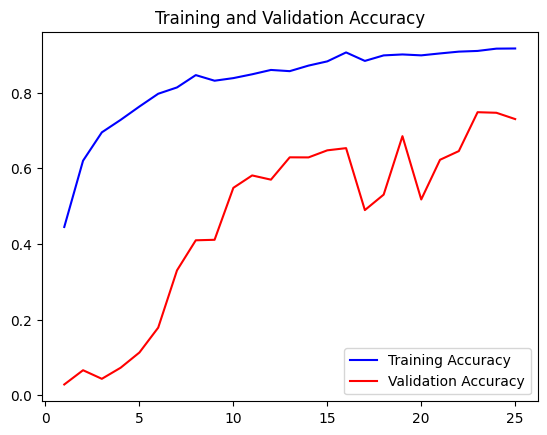

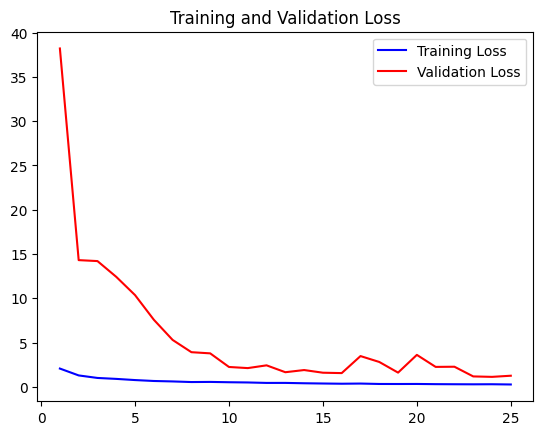

In [36]:
accuracy=history.history["accuracy"]
validation_accuracy=history.history["val_accuracy"]
loss=history.history["loss"]
validation_loss=history.history["val_loss"]
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,"b",label="Training Accuracy")
plt.plot(epochs,validation_accuracy,"r",label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,"b",label="Training Loss")
plt.plot(epochs,validation_loss,"r",label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [39]:
test_dir="/Users/shashwatraj/Garud-Plant-Disease-Detection/test"
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_size[0],img_size[1]),
    batch_size=n_img,
    shuffle=False
    
)

Found 33 files belonging to 1 classes.


In [44]:
labels_pred = model.predict(test_data)
# Convert test_data labels to one-hot encoding as the model expects one-hot labels.
test_data_onehot = test_data.map(lambda x, y: (x, tf.one_hot(y, depth=38)))
print(model.evaluate(test_data_onehot)[1]*100)
print(model.evaluate(val_data)[1]*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.0000e+00 - loss: 5907.1289
0.0
176/176 ━━━━━━━━━━━━━━━━━━━━ 89s 502ms/step - accuracy: 0.7378 - loss: 1.2311
73.37810397148132


In [ ]:
print("Calculating model accuracy...")
score=model.evaluate(x_test,y_test)
print(f"Test_Accuracy:{score[1]*100}")

In [ ]:
!wget https://ohioline.osu.edu/sites/ohioline/files/imce/Plant_Pathology/PLNTPTH-CER-02_Figure_1.png

In [ ]:
!ls

In [17]:
def predict(img_path):
    img_arr=convert(img_path)
    np_img=np.array(img_arr,dtype=np.float16)/255.0
    np_img=np.expand_dims(np_img,0)
    fig,ax=plt.subplots(1,1)
    result=model.predict_classes(np_img)
    plt.imshow(plt.imread(img_path))
    print("Predicted:",(lb.classes_[result][0]))
    plt.show()

In [ ]:
import glob
images=glob.glob("*.png")
for img in images:
    predict(img)